Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv("/Users/jassi/Datasets/dataset heart diesease.csv")

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Q2. Split the dataset into a training set (70%) and a test set (30%).

In [17]:
## Independent and dependent values
X=df.drop(labels=['target'],axis=1)
y=df['target']

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred=rfc.predict(X_test)


In [24]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8131868131868132
0.8367346938775511
0.82
0.8282828282828283


Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

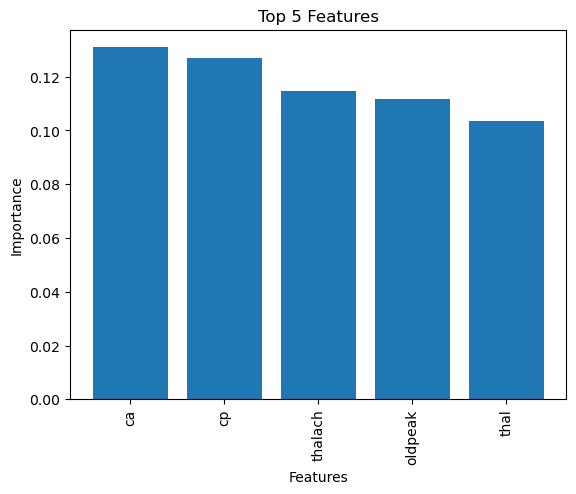

In [26]:
# get feature importances and sort them in descending order
importances = rfc.feature_importances_
indices = importances.argsort()[::-1]

# get the top 5 features and their importances
top_features = X_train.columns[indices][:5]
top_importances = importances[indices][:5]

# plot the feature importances
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Features')
plt.show()


Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

## Hyperparameter tuning on Random Forest

params={'max_depth':[3,4,10,None],
       'n_estimators':[100,200,300],
       'criterion':['gini','entropy']
       }

In [32]:
classifier=RandomForestClassifier()

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.814 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.762 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.905 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.762 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=100;, score

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [35]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 3, 'criterion': 'gini'}

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

## Insights 
The insights of the model include that maximum heart rate achieved is the most important feature in predicting heart disease risk, followed by thalassemia, age, number of major vessels, and serum cholesterol. The model also has limitations, such as being limited to the features available in the dataset and not being able to capture all the factors that contribute to heart disease risk. Additionally, the model may not generalize well to other populations or time periods.




